## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Overview

## Business Problem

Home flipping describes buying houses, adding value through remodels or other features, and selling for profit. To this end, this analysis seeks to give home flippers the best way to add value (maximize sale price) to their projects. 

## Data Preparation

In [58]:
import pandas as pd
df1 = pd.read_csv('data/kc_house_data.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [59]:
df1 = df1.set_index('id') #index to id column

In [60]:
#drop non-relevant columns
df1.drop(labels=['date','view', 'sqft_above', 'sqft_basement', 'yr_renovated',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
         axis=1, inplace=True)

In [61]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [62]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


In [63]:
df1.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [64]:
df1.condition.unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [65]:
df1.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [66]:
df1.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [67]:
#fill nan values in waterfront to 'NO'
df1['waterfront'].fillna('NO', inplace=True)

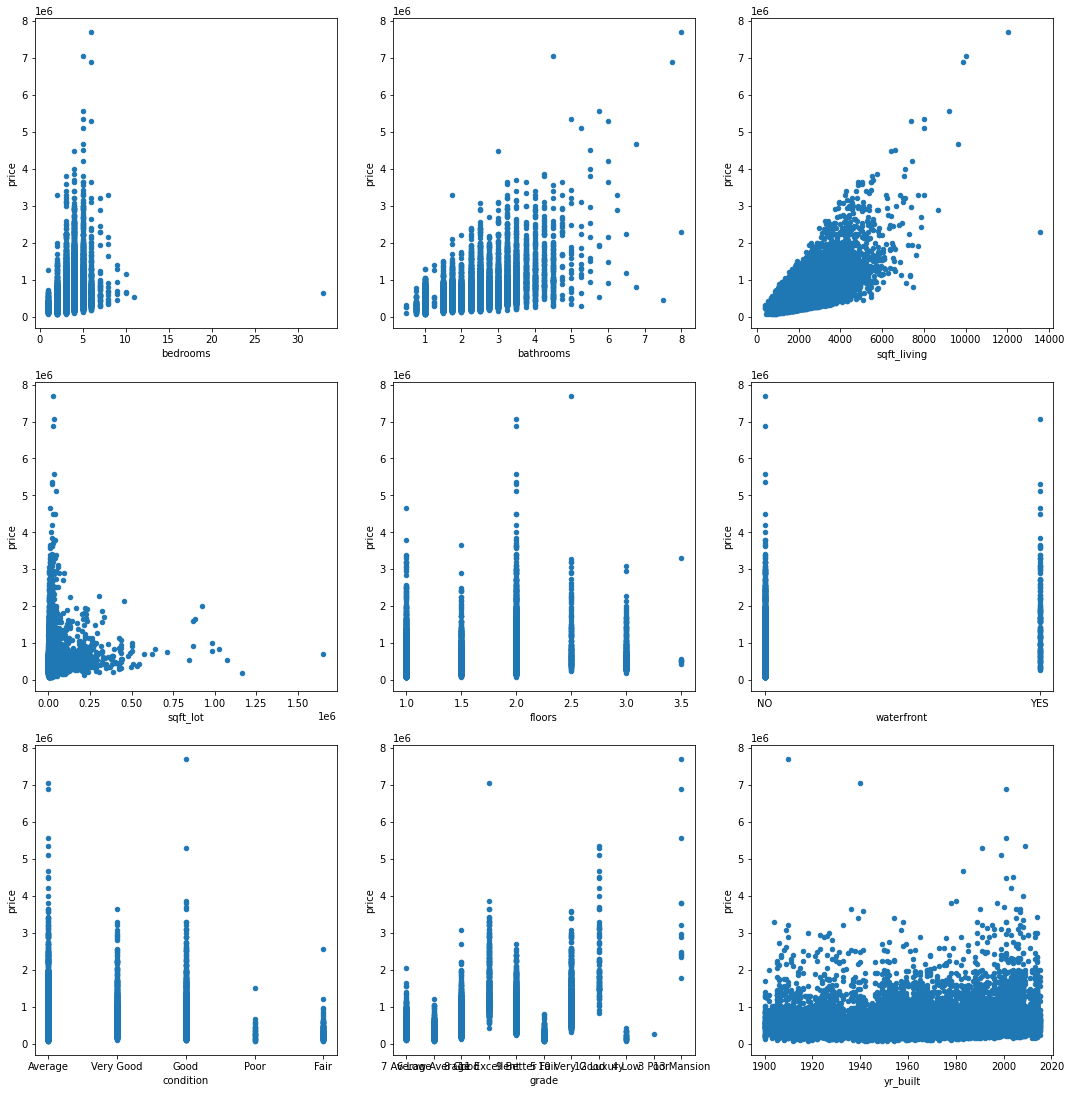

In [68]:
plt.figure(figsize=(15,30))
for i, col in enumerate(df1.drop('price', axis=1).columns):
    ax = plt.subplot(6, 3, i+1)
    df1.plot.scatter(x=col, y='price', ax=ax, legend=False)
plt.tight_layout()
plt.show()

These continuous variables appear somewhat correlated with price:

<br>

-bedrooms
<br>
-bathrooms
<br>
-sqft_living
<br>
-sqft_lot
<br>
-yr_built
<br>

Categorical variables include:


<br>
-condition
<br>
-grade
<br>
-waterfront

Uncorrelated variables will be revealed by large p-values in modeling


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

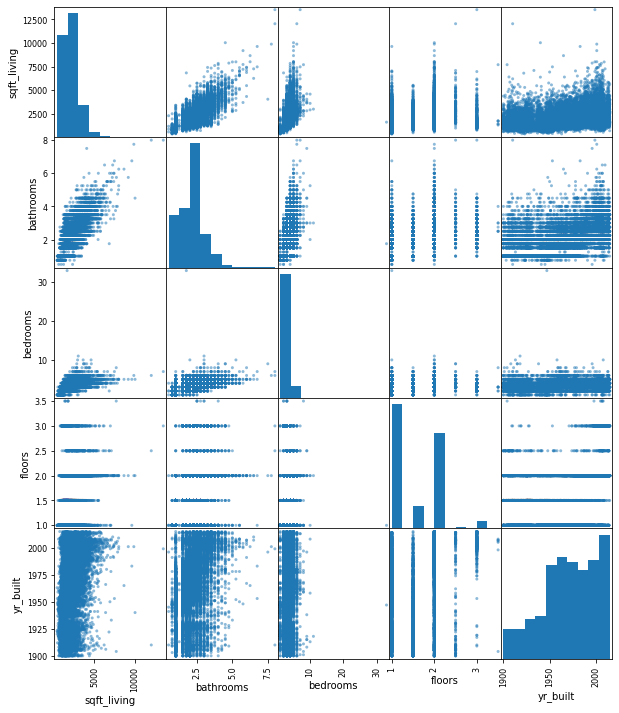

In [70]:
x_col = ['sqft_living', 'bathrooms', 'bedrooms', 'floors', 'yr_built']
pd.plotting.scatter_matrix(df1[x_col], figsize=(10,12));

In [71]:
#non-normal distribution for many predictors. Transformation neeeded to refine
#modelling

In [72]:
corr = df1.drop('price' , axis=1).corr()

df_corr=corr.abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr[(df_corr.cc>.8) & (df_corr.cc <1)]

,cc
pairs,


<AxesSubplot:>

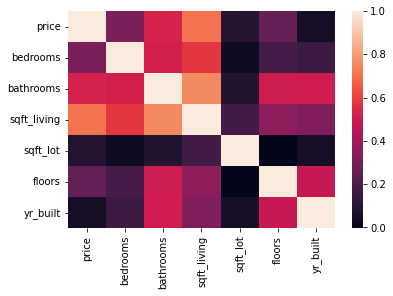

In [73]:
sns.heatmap(df1.corr())

Risk of multicollinearity with:
 bathrooms and sqft_living 

r > .65

Price and sqft_living appear to have greatest correlation. This will serve as our baseline model.

Before modeling, categorical variables (condition, grade, waterfront) must be converted to dummy variables.

In [74]:
cond_dummies = pd.get_dummies(df1['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df1['grade'], prefix='grd', drop_first=True)
waterf_dummies = pd.get_dummies(df1['waterfront'], prefix='wtf', drop_first=True)

In [75]:
floor_dummies = pd.get_dummies(df1['floors'], prefix='flr', drop_first=True)

In [76]:
df3 = pd.concat([df1, cond_dummies, grade_dummies, waterf_dummies, floor_dummies], axis=1)
df3.head() #added floors

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,...,grd_6 Low Average,grd_7 Average,grd_8 Good,grd_9 Better,wtf_YES,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1955,...,0,1,0,0,0,0,0,0,0,0
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,...,0,1,0,0,0,0,1,0,0,0
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,...,1,0,0,0,0,0,0,0,0,0
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,...,0,1,0,0,0,0,0,0,0,0
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,...,0,0,1,0,0,0,0,0,0,0


In [77]:
new1 = []
for col in df3.columns:
    new1.append(col.replace(' ', '_'))
    

In [78]:
new2 = []
for col in df3.columns:
    new2.append(col.replace('.', '_').replace(' ', '_'))

In [79]:
new2

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'yr_built',
 'cond_Fair',
 'cond_Good',
 'cond_Poor',
 'cond_Very_Good',
 'grd_11_Excellent',
 'grd_12_Luxury',
 'grd_13_Mansion',
 'grd_3_Poor',
 'grd_4_Low',
 'grd_5_Fair',
 'grd_6_Low_Average',
 'grd_7_Average',
 'grd_8_Good',
 'grd_9_Better',
 'wtf_YES',
 'flr_1_5',
 'flr_2_0',
 'flr_2_5',
 'flr_3_0',
 'flr_3_5']

In [80]:
df3.columns = new2

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21597 non-null  float64
 1   bedrooms           21597 non-null  int64  
 2   bathrooms          21597 non-null  float64
 3   sqft_living        21597 non-null  int64  
 4   sqft_lot           21597 non-null  int64  
 5   floors             21597 non-null  float64
 6   waterfront         21597 non-null  object 
 7   condition          21597 non-null  object 
 8   grade              21597 non-null  object 
 9   yr_built           21597 non-null  int64  
 10  cond_Fair          21597 non-null  uint8  
 11  cond_Good          21597 non-null  uint8  
 12  cond_Poor          21597 non-null  uint8  
 13  cond_Very_Good     21597 non-null  uint8  
 14  grd_11_Excellent   21597 non-null  uint8  
 15  grd_12_Luxury      21597 non-null  uint8  
 16  grd_13_M

In [82]:
processed1 = df3.drop(['waterfront', 'condition', 'grade', 'floors'], axis=1)
processed1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,cond_Fair,cond_Good,cond_Poor,cond_Very_Good,...,grd_6_Low_Average,grd_7_Average,grd_8_Good,grd_9_Better,wtf_YES,flr_1_5,flr_2_0,flr_2_5,flr_3_0,flr_3_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6414100192,538000.0,3,2.25,2570,7242,1951,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Data Modeling

## First Model Iteration

In [83]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [84]:
#First iteration of model with price and sqft_living:

f='price~sqft_living'
model1 = smf.ols(formula=f, data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:04:25   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Statistically significant r-squared value of 0.493. Jarque-Bera value is high, indicating a possible non-normal distribution. 

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


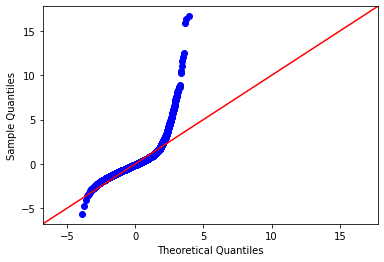

In [85]:
#Checking for normality:
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)

In [86]:
#residuals are non-normal, violates normality assumption.

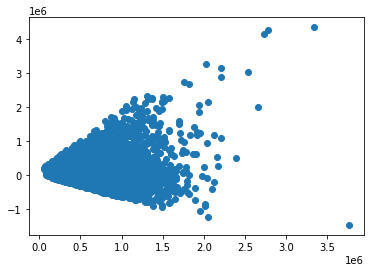

In [87]:
plt.scatter(model1.predict(df1['sqft_living']), model1.resid)

In [88]:
#For higher home prices, model lacks accuracy. sqft_living violates homoscedacity
#assumption


In [89]:
#drop outliers more than 3 sd's away?

## Second iteration

In [90]:
outcome = 'price'
predictors = processed1.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model2=smf.ols(formula=formula, data=processed1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1795.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:04:25   Log-Likelihood:            -2.9524e+05
No. Observations:               21597   AIC:                         5.905e+05
Df Residuals:                   21571   BIC:                         5.907e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.387e+06    1.4e+05     52.817      0.000    7.11e+06    7.66e+06
bedrooms          -2.755e+04   2014.830    -13.671      0.000   -3.15e+04   -2.36e+04
bathrooms          5.645e+04   3351.130     16.846      0.000    4.99e+04     6.3e+04
sqft_living         148.6052      3.321     44.749      0.000     142.096     155.114
sqft_lot             -0.2621      0.035     -7.411      0.000      -0.331      -0.193
yr_built          -3479.2064     70.976    -49.020      0.000   -3618.324   -3340.089
cond_Fair          -3.31e+04   1.64e+04     -2.024      0.043   -6.52e+04   -1047.733
cond_Good          1.488e+04   3548.151      4.192      0.000    7920.709    2.18e+04
cond_Poor         -3.421e+04   3.93e+04     -0.871      0.383   -1.11e+05    4.27e+04
cond_Very_Good     5.377e+04   5717.876      9.404      0.000    4.26e+04     6.5e+04
grd_11_Excellent   2.663e+05   1.24e+04     21.434      0.000    2.42e+05    2.91e+05
grd_12_Luxury        7.4e+05   2.37e+04     31.169      0.000    6.93e+05    7.87e+05
grd_13_Mansion     1.914e+06   5.95e+04     32.144      0.000     1.8e+06    2.03e+06
grd_3_Poor        -5.875e+05    2.1e+05     -2.801      0.005   -9.99e+05   -1.76e+05
grd_4_Low         -5.423e+05   4.16e+04    -13.038      0.000   -6.24e+05   -4.61e+05
grd_5_Fair        -5.632e+05   1.65e+04    -34.042      0.000   -5.96e+05   -5.31e+05
grd_6_Low_Average -5.111e+05   1.02e+04    -50.194      0.000   -5.31e+05   -4.91e+05
grd_7_Average     -4.275e+05   8368.110    -51.081      0.000   -4.44e+05   -4.11e+05
grd_8_Good        -3.328e+05   7672.231    -43.376      0.000   -3.48e+05   -3.18e+05
grd_9_Better      -1.812e+05   7659.141    -23.662      0.000   -1.96e+05   -1.66e+05
wtf_YES            7.294e+05   1.76e+04     41.380      0.000    6.95e+05    7.64e+05
flr_1_5             240.0399   5513.425      0.044      0.965   -1.06e+04     1.1e+04
flr_2_0            1975.3131   4061.598      0.486      0.627   -5985.720    9936.346
flr_2_5             1.05e+05   1.69e+04      6.206      0.000    7.19e+04    1.38e+05
flr_3_0            1.301e+05   9491.001     13.711      0.000    1.12e+05    1.49e+05
flr_3_5            1.903e+05   7.93e+04      2.399      0.016    3.48e+04    3.46e+05
==============================================================================
Omnibus:                    12141.436   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           391289.623
Skew:                           2.131   Prob(JB):                         0.00
Kurtosis:                      23.412   Cond. No.                     6.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

All variables except cond_Poor and cond_Fair are statistically significant from zero. 
<br>

R_squared is higher than the baseline model, indicating a stronger model in explaining the variance in the dependent variable.


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


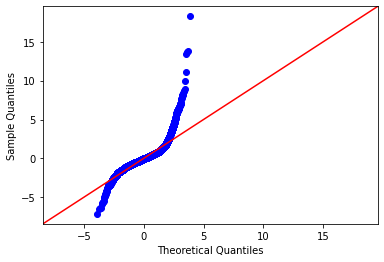

In [91]:
#check for normality
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

In [92]:
#residuals are not normally distributed. manipulation needed

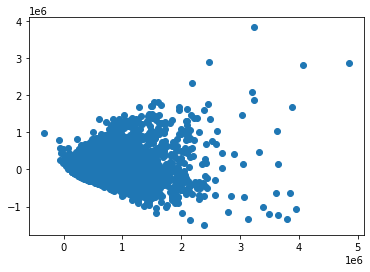

In [93]:
#check for homscedasticity

plt.scatter(model2.predict(predictors), model2.resid)

In [94]:
#similarly to baseline model, violates homoscedacity assumption. Higher priced
#homes are not as accurately predicted.

In [96]:
#check for multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = sm.add_constant(predictors)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('const', 9632.531752443198),
 ('bedrooms', 1.715114384882008),
 ('bathrooms', 3.2698774954765892),
 ('sqft_living', 4.577205626200052),
 ('sqft_lot', 1.056247306154598),
 ('yr_built', 2.1403943579497704),
 ('cond_Fair', 1.0283816506470083),
 ('cond_Good', 1.201194382923227),
 ('cond_Poor', 1.0173701498449685),
 ('cond_Very_Good', 1.168117996957679),
 ('grd_11_Excellent', 1.3788666898802502),
 ('grd_12_Luxury', 1.1391125531557291),
 ('grd_13_Mansion', 1.0503681678848267),
 ('grd_3_Poor', 1.0030566739370834),
 ('grd_4_Low', 1.0637500540510327),
 ('grd_5_Fair', 1.4934100956161434),
 ('grd_6_Low_Average', 4.364005053869652),
 ('grd_7_Average', 8.374340118978989),
 ('grd_8_Good', 5.853946192088406),
 ('grd_9_Better', 3.074121434632888),
 ('wtf_YES', 1.027250980428474),
 ('flr_1_5', 1.2067105157454445),
 ('flr_2_0', 1.9163561069721906),
 ('flr_2_5', 1.0436873835937155),
 ('flr_3_0', 1.2193885747546287),
 ('flr_3_5', 1.0040442052014005)]

In [42]:
#multicollinearity occuring, as variance inflation factor is >10 for all variables

## Model Refinement

Due to the larger errors for higher priced homes, removing outliers from the baseline model may improve model performance. 

In [43]:
#Finding standard deviation values to identify outliers that are 3 sd's away
#from the mean (price)

sd = df1['price']

In [44]:
sd.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [45]:
std = 3.673681e+05
mean = 5.402966e+05
high_outliers = mean + (3*std)

In [46]:
refined = processed1[processed1['price'] < high_outliers]
refined

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,cond_Fair,cond_Good,cond_Poor,cond_Very_Good,...,grd_6_Low_Average,grd_7_Average,grd_8_Good,grd_9_Better,wtf_YES,flr_1_5,flr_2_0,flr_2_5,flr_3_0,flr_3_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6414100192,538000.0,3,2.25,2570,7242,1951,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,2009,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6600060120,400000.0,4,2.50,2310,5813,2014,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1523300141,402101.0,2,0.75,1020,1350,2009,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Moreover, log transforming our continuous variables may improve model performance by reducing skew and achieving more normal distribution for our predictors.

In [47]:
import numpy as np

In [48]:
continuous = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'yr_built']
for col in continuous:
    refined[col] = refined[col].map(np.log)


<ipython-input-48-01157df4a616>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined[col] = refined[col].map(np.log)


In [49]:
refined.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,cond_Fair,cond_Good,cond_Poor,cond_Very_Good,...,grd_6_Low_Average,grd_7_Average,grd_8_Good,grd_9_Better,wtf_YES,flr_1_5,flr_2_0,flr_2_5,flr_3_0,flr_3_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,12.309982,1.098612,0.000000,7.073270,5650,7.578145,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6414100192,13.195614,1.098612,0.810930,7.851661,7242,7.576097,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5631500400,12.100712,0.693147,0.000000,6.646391,10000,7.566828,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2487200875,13.311329,1.386294,1.098612,7.580700,5000,7.583248,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1954400510,13.142166,1.098612,0.693147,7.426549,8080,7.594381,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
outcome = 'price'
predictors = '+'.join(refined.columns[1:])
formula = outcome + '~' + predictors
model3 = smf.ols(formula=formula, data=refined).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1313.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:18:19   Log-Likelihood:                -5029.9
No. Observations:               21191   AIC:                         1.011e+04
Df Residuals:                   21166   BIC:                         1.031e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            98.6352      1.598     61.735      0.000      95.504     101.767
bedrooms             -0.1505      0.010    -14.686      0.000      -0.171      -0.130
bathrooms             0.1349      0.010     13.845      0.000       0.116       0.154
sqft_living           0.4179      0.011     39.413      0.000       0.397       0.439
sqft_lot           7.388e-08   5.35e-08      1.381      0.167    -3.1e-08    1.79e-07
yr_built            -11.6261      0.209    -55.515      0.000     -12.037     -11.216
cond_Fair            -0.1714      0.024     -7.127      0.000      -0.219      -0.124
cond_Good             0.0119      0.005      2.262      0.024       0.002       0.022
cond_Poor            -0.1445      0.058     -2.511      0.012      -0.257      -0.032
cond_Very_Good        0.0770      0.009      9.038      0.000       0.060       0.094
grd_11_Excellent      0.1401      0.021      6.753      0.000       0.099       0.181
grd_12_Luxury         0.2633      0.055      4.769      0.000       0.155       0.371
grd_13_Mansion    -2.111e-13    8.8e-14     -2.399      0.016   -3.84e-13   -3.86e-14
grd_3_Poor           -0.9177      0.308     -2.983      0.003      -1.521      -0.315
grd_4_Low            -1.0919      0.061    -17.772      0.000      -1.212      -0.971
grd_5_Fair           -1.0839      0.025    -43.870      0.000      -1.132      -1.035
grd_6_Low_Average    -0.9014      0.015    -59.272      0.000      -0.931      -0.872
grd_7_Average        -0.6609      0.012    -54.239      0.000      -0.685      -0.637
grd_8_Good           -0.4262      0.011    -37.850      0.000      -0.448      -0.404
grd_9_Better         -0.1671      0.012    -14.416      0.000      -0.190      -0.144
wtf_YES               0.4025      0.035     11.655      0.000       0.335       0.470
flr_1_5               0.0365      0.008      4.471      0.000       0.020       0.052
flr_2_0               0.0448      0.006      7.458      0.000       0.033       0.057
flr_2_5               0.0922      0.027      3.442      0.001       0.040       0.145
flr_3_0               0.2551      0.014     18.085      0.000       0.227       0.283
flr_3_5               0.2727      0.126      2.172      0.030       0.027       0.519
==============================================================================
Omnibus:                       86.725   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.896
Skew:                          -0.120   Prob(JB):                     2.47e-21
Kurtosis:                       3.222   Cond. No.                     1.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


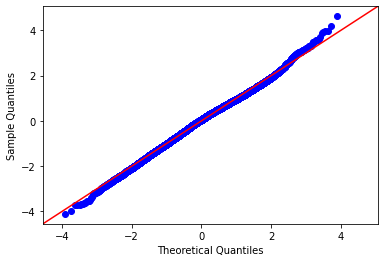

In [51]:
#check normality
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

In [52]:
#normal!

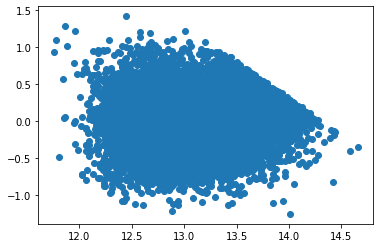

In [54]:
#check for homscedasticity

plt.scatter(model3.predict(refined.drop('price', axis=1)), model3.resid)

Achieved normality and Homoscedasticity, but r_squared lowered. Removing non-significant features (p-value>0.05) may increase the efficacy of our model in explaining the variance in the dependent variable. The only variable not statistically significant from zero is:
<br>

-sqft_lot



In [55]:
refined.drop('sqft_lot', axis=1)
refined.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,cond_Fair,cond_Good,cond_Poor,cond_Very_Good,...,grd_6_Low_Average,grd_7_Average,grd_8_Good,grd_9_Better,wtf_YES,flr_1_5,flr_2_0,flr_2_5,flr_3_0,flr_3_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,12.309982,1.098612,0.000000,7.073270,5650,7.578145,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6414100192,13.195614,1.098612,0.810930,7.851661,7242,7.576097,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5631500400,12.100712,0.693147,0.000000,6.646391,10000,7.566828,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2487200875,13.311329,1.386294,1.098612,7.580700,5000,7.583248,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1954400510,13.142166,1.098612,0.693147,7.426549,8080,7.594381,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


The yr_built variable is expressed as the year built, rather than years SINCE construction. The log transformation of those years do not make sense as a predictor in this context. Changing the yr_built to years since construction may improve model performance.

In [ ]:

#undo log transfrom, keep price, 

## Third iteration

While log transforming our continuous variables allowed our model to meet the assumptions of normality and homosckedacity, transforming ALL continuous variables may not be necesary. In fact, stakeholders will better understand the interpretation of coefficients that have not been log transformed. To this end, I will undo the transformations of bedrooms, bathrooms, sqft_living, and yr_built. However price will maintain its log transformation. 

In [97]:
#load dataframe with dummy variables, without outliers, but b4 log transfrom
refined2 = processed1[processed1['price'] < high_outliers]
refined2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,cond_Fair,cond_Good,cond_Poor,cond_Very_Good,...,grd_6_Low_Average,grd_7_Average,grd_8_Good,grd_9_Better,wtf_YES,flr_1_5,flr_2_0,flr_2_5,flr_3_0,flr_3_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1955,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6414100192,538000.0,3,2.25,2570,7242,1951,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5631500400,180000.0,2,1.00,770,10000,1933,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1954400510,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [98]:
#log transform price
refined2['price'] = np.log(refined2['price'])

<ipython-input-98-c0301f7be1a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined2['price'] = np.log(refined2['price'])


In [99]:
refined2.head()
#check 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,cond_Fair,cond_Good,cond_Poor,cond_Very_Good,...,grd_6_Low_Average,grd_7_Average,grd_8_Good,grd_9_Better,wtf_YES,flr_1_5,flr_2_0,flr_2_5,flr_3_0,flr_3_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,12.309982,3,1.00,1180,5650,1955,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6414100192,13.195614,3,2.25,2570,7242,1951,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5631500400,12.100712,2,1.00,770,10000,1933,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2487200875,13.311329,4,3.00,1960,5000,1965,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1954400510,13.142166,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
#run model:
outcome = 'price'
predictors = '+'.join(refined2.columns[1:])
formula = outcome + '~' + predictors
model4 = smf.ols(formula=formula, data=refined2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1310.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:33:34   Log-Likelihood:                -5047.0
No. Observations:               21191   AIC:                         1.014e+04
Df Residuals:                   21166   BIC:                         1.034e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            24.5779      0.209    117.435      0.000      24.168      24.988
bedrooms             -0.0327      0.003    -10.865      0.000      -0.039      -0.027
bathrooms             0.0796      0.005     15.822      0.000       0.070       0.089
sqft_living           0.0002    5.1e-06     37.966      0.000       0.000       0.000
sqft_lot           2.986e-08   5.37e-08      0.556      0.578   -7.54e-08    1.35e-07
yr_built             -0.0059      0.000    -55.304      0.000      -0.006      -0.006
cond_Fair            -0.1742      0.024     -7.239      0.000      -0.221      -0.127
cond_Good             0.0157      0.005      2.992      0.003       0.005       0.026
cond_Poor            -0.1382      0.058     -2.399      0.016      -0.251      -0.025
cond_Very_Good        0.0805      0.009      9.468      0.000       0.064       0.097
grd_11_Excellent      0.0571      0.021      2.728      0.006       0.016       0.098
grd_12_Luxury         0.1178      0.055      2.123      0.034       0.009       0.227
grd_13_Mansion    -3.558e-15   2.63e-15     -1.353      0.176   -8.71e-15     1.6e-15
grd_3_Poor           -1.0314      0.308     -3.351      0.001      -1.635      -0.428
grd_4_Low            -1.1740      0.061    -19.197      0.000      -1.294      -1.054
grd_5_Fair           -1.1019      0.025    -44.794      0.000      -1.150      -1.054
grd_6_Low_Average    -0.8853      0.015    -57.380      0.000      -0.916      -0.855
grd_7_Average        -0.6026      0.013    -47.096      0.000      -0.628      -0.578
grd_8_Good           -0.3593      0.012    -30.538      0.000      -0.382      -0.336
grd_9_Better         -0.1233      0.012    -10.488      0.000      -0.146      -0.100
wtf_YES               0.4174      0.035     12.084      0.000       0.350       0.485
flr_1_5               0.0463      0.008      5.685      0.000       0.030       0.062
flr_2_0               0.0449      0.006      7.431      0.000       0.033       0.057
flr_2_5               0.0866      0.027      3.226      0.001       0.034       0.139
flr_3_0               0.2487      0.014     17.608      0.000       0.221       0.276
flr_3_5               0.2720      0.126      2.164      0.030       0.026       0.518
==============================================================================
Omnibus:                      113.574   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.675
Skew:                          -0.129   Prob(JB):                     6.94e-29
Kurtosis:                       3.283   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

In [102]:
#drop variables that are not statistically significant (sqft_lot, grd_13_mansion)
refined2 = refined2.drop(['sqft_lot', 'grd_13_Mansion'], axis=1)


In [103]:
refined2.head()

,price,bedrooms,bathrooms,sqft_living,yr_built,cond_Fair,cond_Good,cond_Poor,cond_Very_Good,grd_11_Excellent,...,grd_6_Low_Average,grd_7_Average,grd_8_Good,grd_9_Better,wtf_YES,flr_1_5,flr_2_0,flr_2_5,flr_3_0,flr_3_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,12.309982,3,1.00,1180,1955,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6414100192,13.195614,3,2.25,2570,1951,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5631500400,12.100712,2,1.00,770,1933,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2487200875,13.311329,4,3.00,1960,1965,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1954400510,13.142166,3,2.00,1680,1987,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
#run model again:
outcome = 'price'
predictors = '+'.join(refined2.columns[1:])
formula = outcome + '~' + predictors
model5 = smf.ols(formula=formula, data=refined2).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1367.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:38:43   Log-Likelihood:                -5047.2
No. Observations:               21191   AIC:                         1.014e+04
Df Residuals:                   21167   BIC:                         1.033e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            24.5706      0.209    117.637      0.000      24.161      24.980
bedrooms             -0.0328      0.003    -10.942      0.000      -0.039      -0.027
bathrooms             0.0796      0.005     15.813      0.000       0.070       0.089
sqft_living           0.0002   5.05e-06     38.475      0.000       0.000       0.000
yr_built             -0.0059      0.000    -55.387      0.000      -0.006      -0.006
cond_Fair            -0.1736      0.024     -7.221      0.000      -0.221      -0.126
cond_Good             0.0158      0.005      3.006      0.003       0.005       0.026
cond_Poor            -0.1379      0.058     -2.395      0.017      -0.251      -0.025
cond_Very_Good        0.0805      0.009      9.468      0.000       0.064       0.097
grd_11_Excellent      0.0572      0.021      2.729      0.006       0.016       0.098
grd_12_Luxury         0.1176      0.055      2.120      0.034       0.009       0.226
grd_3_Poor           -1.0311      0.308     -3.351      0.001      -1.634      -0.428
grd_4_Low            -1.1738      0.061    -19.195      0.000      -1.294      -1.054
grd_5_Fair           -1.1014      0.025    -44.803      0.000      -1.150      -1.053
grd_6_Low_Average    -0.8852      0.015    -57.379      0.000      -0.915      -0.855
grd_7_Average        -0.6027      0.013    -47.099      0.000      -0.628      -0.578
grd_8_Good           -0.3594      0.012    -30.546      0.000      -0.382      -0.336
grd_9_Better         -0.1233      0.012    -10.493      0.000      -0.146      -0.100
wtf_YES               0.4177      0.035     12.096      0.000       0.350       0.485
flr_1_5               0.0464      0.008      5.706      0.000       0.030       0.062
flr_2_0               0.0446      0.006      7.411      0.000       0.033       0.056
flr_2_5               0.0864      0.027      3.221      0.001       0.034       0.139
flr_3_0               0.2483      0.014     17.604      0.000       0.221       0.276
flr_3_5               0.2716      0.126      2.161      0.031       0.025       0.518
==============================================================================
Omnibus:                      113.822   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.042
Skew:                          -0.129   Prob(JB):                     5.78e-29
Kurtosis:                       3.283   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


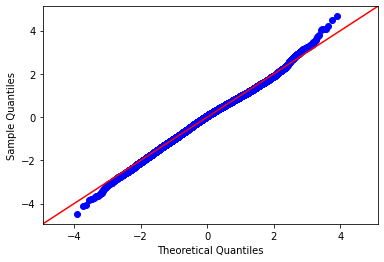

In [105]:
#check normailty assumnption:
fig = sm.graphics.qqplot(model5.resid, dist=stats.norm, line='45', fit=True)

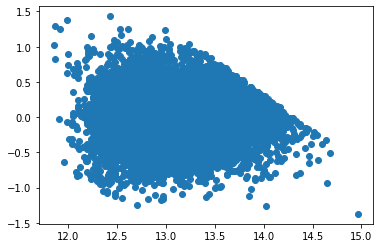

In [106]:
#check homosckedacity:
plt.scatter(model5.predict(refined2.drop('price', axis=1)), model5.resid)

# Model Analysis and Conclusion

Circling back to how home-flippers can add value to their projects (maximize sale price), the model has identified the variables that provide the most positive impact on price. In accordance with the model's findings I recommend:
<br>

1. Add Bathrooms 

According to the model, an increase in one bathroom results in 7.96% increase in sale price. Adding a bathroom is a practical, less capital-intensive strategy that produces a significant increase in sale price. 
<br>

2. Increase construction grade to Excellent or Luxury. Do not decrease construction grade or risk losing significant value.
<br>

From a baseline of 10, achieving a construction grade of 11 'Excellent'  increases sale price by 5.72%
<br>
Achieving a construction grade of 12 'Luxury'  increases sale price by 11.76%.
<br>

In contrast decreasing construction grade consistently decreases sale price. In fact, a lowering of construction grade to  6 'Below Average' results in a 88.52% decrease in sale price. Overall, developers and home-flippers should build/remodel in accordance with high construction grade qualifications to increase value. They should also avoid downgrading their project's construction grade to prevent price decreases. High construction grade qualifications include (King Country Assessor):

<br>
-Custom design
<br>
-High quality finish
<br>
-Excellent builders
<br>
-Added amenities of solid woods, bathroom fixtures and more luxurious options.
<br>
-Materials of highest quality


3. Adding floors
<br>

From a baseline of 1 floor, adding 0.5 floors (1.5 floors total) results in a 4.64% increase in sale price.
<br>

Adding 1 floor (2.0 floors total) results in a 4.46% increase in sale price.
<br>

Adding 1.5 floors (2.5 floors total) results in a 8.64% increase in sale price.
<br>

Adding 2 floors (3 floors total) results in a 24.83% increase in sale price
<br>

Finally, adding 2.5 floors (3.5 floors total) results in 27.16% increase in sale price.
<br>

Overall, developers and home-flippers should add floors to raise the value of their projects. However, this strategy can be cost intensive, especially when adding more than one floor. That being said, achieving a height of 3 or 3.5 floors significantly increases sale price (24.83% and 27.16% increase respectively). If a flipper opts for a more intensive remodel, adding floors is a good strategy. For less intensive remodels, adding floors may not be as cost efficient as the flipper desires.

## Other Considerations

This inferential model eliminated outliers above 3 standard deviations of price. The model's errors, or "noise," were especially large for these higher priced homes. This may indicate that for the highest priced homes, different variables than the ones used in the model better explain price. Further analysis is recommended for pricing these homes.